In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unicorn-dataset/unicorns till sep 2022.csv


DATA CLEANING


In [2]:
import pandas as pd

df = pd.read_csv('/kaggle/input/unicorn-dataset/unicorns till sep 2022.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Company         1186 non-null   object
 1   Valuation ($B)  1186 non-null   object
 2   Date Joined     1186 non-null   object
 3   Country         1186 non-null   object
 4   City            1186 non-null   object
 5   Industry        1186 non-null   object
 6   Investors       1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB


,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [3]:
df.columns = df.columns.str.strip()

print(df.columns)

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City',
       'Industry', 'Investors'],
      dtype='object')


In [4]:
df['Valuation ($B)'] = df['Valuation ($B)'].replace('[\$,]', '', regex=True).astype(float)

df['Valuation ($B)'].head()

0    140.0
1    127.0
2    100.0
3     95.0
4     40.0
Name: Valuation ($B), dtype: float64

In [5]:
df['Date Joined'] = pd.to_datetime(df['Date Joined'], errors='coerce')

df[df['Date Joined'].isna()]

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors


In [6]:
df['Year Joined'] = df['Date Joined'].dt.year

df[['Date Joined', 'Year Joined']].head()

,Date Joined,Year Joined
0,2017-04-07,2017
1,2012-12-01,2012
2,2018-07-03,2018
3,2014-01-23,2014
4,2018-01-08,2018


In [7]:
df['Investor Count'] = df['Investors'].fillna('').apply(lambda x: len(x.split(',')) if x else 0)

df[['Investors', 'Investor Count']].head()

,Investors,Investor Count
0,"Sequoia Capital China, SIG Asia Investments, S...",4
1,"Founders Fund, Draper Fisher Jurvetson, Rothen...",3
2,"Tiger Global Management, Sequoia Capital China...",3
3,"Khosla Ventures, LowercaseCapital, capitalG",3
4,"Sequoia Capital China, Blackbird Ventures, Mat...",3


In [8]:

df['Investors'] = df['Investors'].fillna('Unknown')
df.isnull().sum()

Company           0
Valuation ($B)    0
Date Joined       0
Country           0
City              0
Industry          0
Investors         0
Year Joined       0
Investor Count    0
dtype: int64

EDA

In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Company,1186,1183,Bolt,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Valuation ($B),1186.0,NaN,NaN,NaN,3.251282,1.0,1.1,1.6,3.0,140.0,7.641574
Date Joined,1186,NaN,NaN,NaN,2020-08-06 15:13:03.136593664,2007-07-02 00:00:00,2019-09-12 12:00:00,2021-05-09 12:00:00,2021-11-14 00:00:00,2022-08-24 00:00:00,NaN
Country,1186,48,United States,636,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,1186,286,San Francisco,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Industry,1186,34,Fintech,239,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Investors,1186,1153,Unknown,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year Joined,1186.0,NaN,NaN,NaN,2020.12226,2007.0,2019.0,2021.0,2021.0,2022.0,1.984172
Investor Count,1186.0,NaN,NaN,NaN,2.801855,0.0,3.0,3.0,3.0,4.0,0.592809


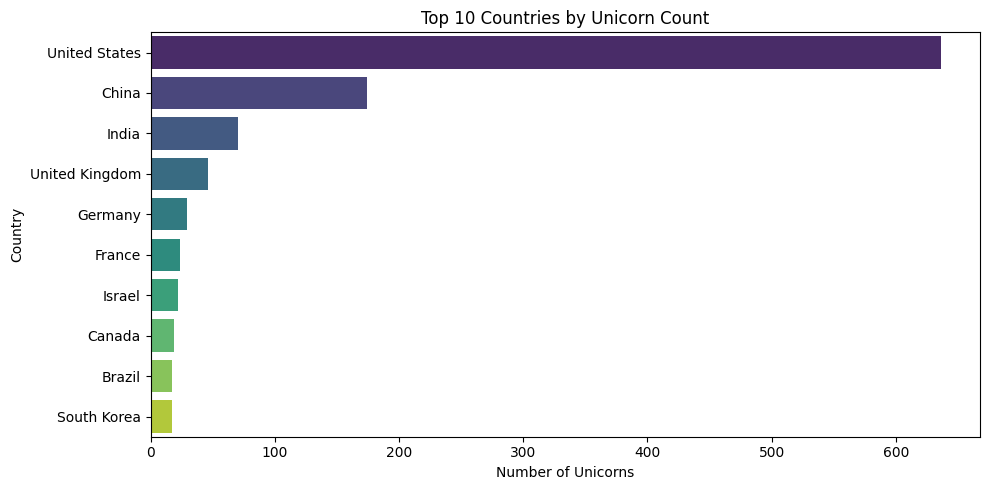

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
country_counts = df['Country'].value_counts().head(10)
sns.barplot(x=country_counts.values, y=country_counts.index, palette='viridis')
plt.title("Top 10 Countries by Unicorn Count")
plt.xlabel("Number of Unicorns")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


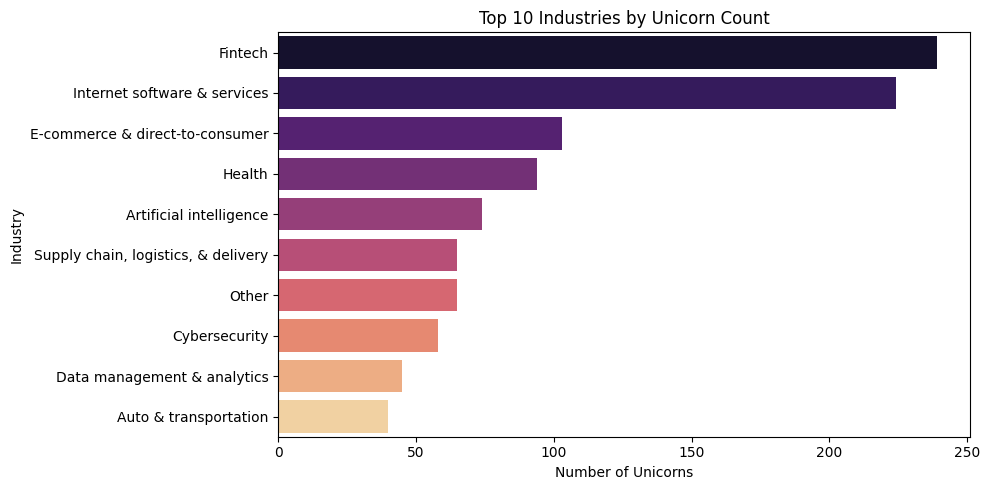

In [11]:
plt.figure(figsize=(10,5))
industry_counts = df['Industry'].value_counts().head(10)
sns.barplot(x=industry_counts.values, y=industry_counts.index, palette='magma')
plt.title("Top 10 Industries by Unicorn Count")
plt.xlabel("Number of Unicorns")
plt.ylabel("Industry")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


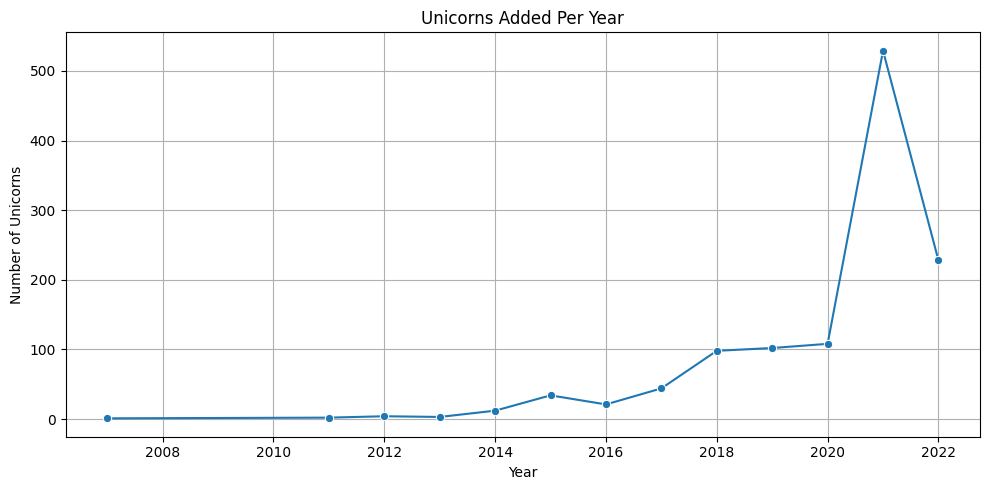

In [12]:
plt.figure(figsize=(10,5))
yearly_counts = df['Year Joined'].value_counts().sort_index()
sns.lineplot(x=yearly_counts.index, y=yearly_counts.values, marker='o')
plt.title("Unicorns Added Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Unicorns")
plt.grid(True)
plt.tight_layout()
plt.show()


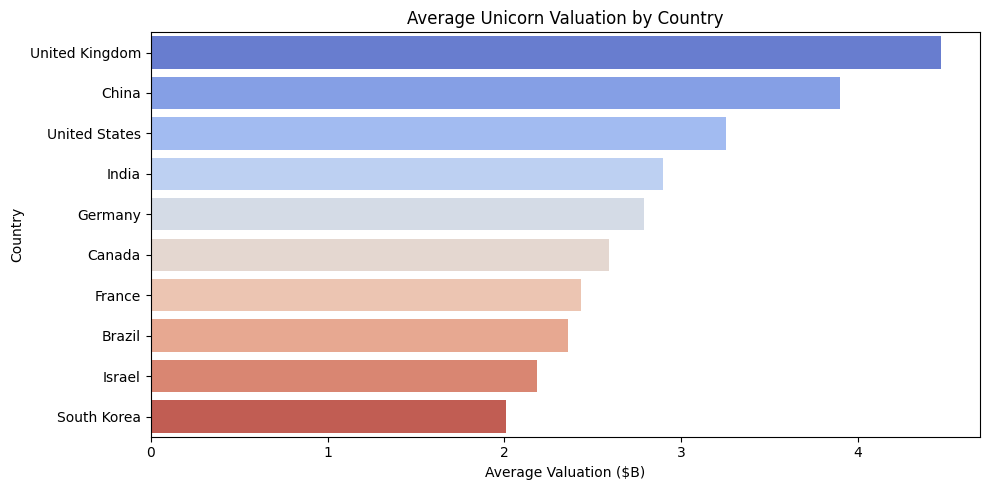

In [13]:
top_countries = df['Country'].value_counts().head(10).index
avg_valuation = df[df['Country'].isin(top_countries)].groupby('Country')['Valuation ($B)'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_valuation.values, y=avg_valuation.index, palette='coolwarm')
plt.title("Average Unicorn Valuation by Country")
plt.xlabel("Average Valuation ($B)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


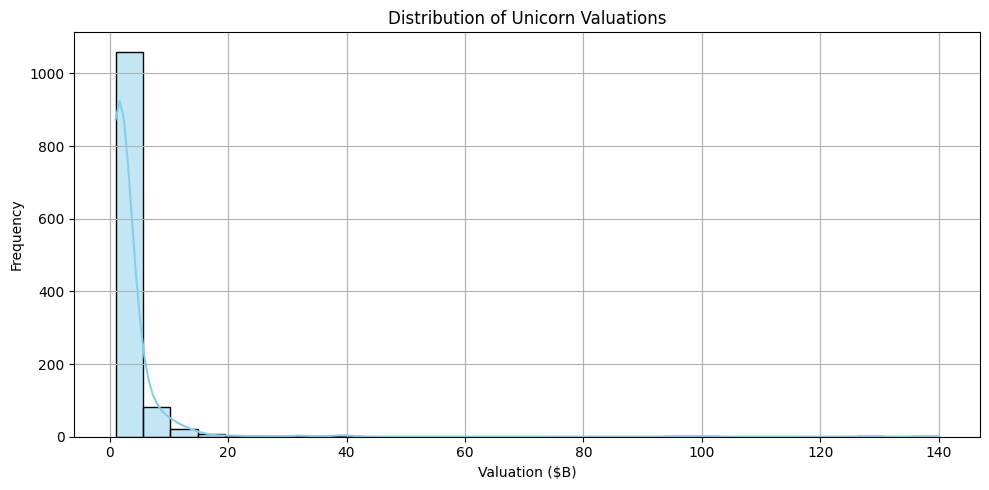

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(df['Valuation ($B)'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Unicorn Valuations")
plt.xlabel("Valuation ($B)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


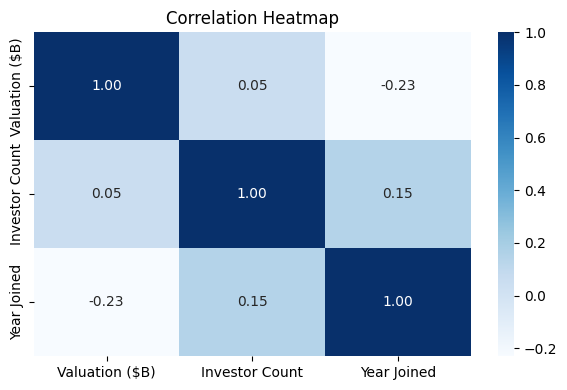

In [15]:
plt.figure(figsize=(6,4))
corr = df[['Valuation ($B)', 'Investor Count', 'Year Joined']].corr()
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


PREDICTIVE MODELLING BY USING MUTIPPLE ALGORITHMS

Linear regression, decision tree, random forest, SVR, XG boost

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [17]:
X = df[['Country', 'Industry', 'Year Joined', 'Investor Count']]
y = df['Valuation ($B)']

In [18]:
cat_features = ['Country', 'Industry']
num_features = ['Year Joined', 'Investor Count']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ],
    remainder='passthrough'
)

In [19]:
import numpy as np

# Log transform target (add 1 to avoid log(0))
df['Log Valuation'] = np.log1p(df['Valuation ($B)'])

# Use this as y
y = df['Log Valuation']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [22]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVR': SVR(),
    'XGBoost': XGBRegressor(random_state=42, objective='reg:squarederror')
}

results = {}

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    results[name] = {
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R²': r2_score(y_test, y_pred)
    }


In [23]:
results_df = pd.DataFrame(results).T.sort_values(by='RMSE')
print(results_df)

                       RMSE       MAE        R²
Linear Regression  0.523918  0.398050 -0.101631
SVR                0.524578  0.372900 -0.104409
Random Forest      0.536265  0.389100 -0.154167
XGBoost            0.547592  0.393202 -0.203437
Decision Tree      0.629440  0.434754 -0.590075


In [24]:
# Convert log predictions back to original scale
y_pred_original = np.expm1(y_pred)




In [25]:
df['Valuation Rank'] = df['Valuation ($B)'].rank(ascending=False)

In [26]:
top_vcs = ['Sequoia', 'SoftBank', 'Accel', 'Andreessen Horowitz', 'Tiger Global', 'DST Global', 'GV', 'Benchmark', 'Lightspeed', 'Kleiner Perkins']

df['VC Power Score'] = df['Investors'].apply(
    lambda x: sum(vc.lower() in x.lower() for vc in top_vcs)
)


In [27]:
def group_industry(industry):
    industry = industry.lower()
    if 'fintech' in industry: return 'Fintech'
    elif 'e-commerce' in industry: return 'E-commerce'
    elif 'software' in industry or 'internet' in industry: return 'Software'
    elif 'data' in industry or 'analytics' in industry: return 'Data & Analytics'
    elif 'ai' in industry or 'artificial' in industry: return 'AI'
    elif 'logistics' in industry or 'delivery' in industry: return 'Logistics'
    elif 'health' in industry: return 'Health'
    elif 'education' in industry: return 'EdTech'
    elif 'gaming' in industry: return 'Gaming'
    else: return 'Other'

df['Industry Grouped'] = df['Industry'].apply(group_industry)


In [28]:
# Simple country to continent mapping
continent_map = {
    'United States': 'North America',
    'India': 'Asia',
    'China': 'Asia',
    'United Kingdom': 'Europe',
    'Germany': 'Europe',
    'France': 'Europe',
    'Canada': 'North America',
    'Brazil': 'South America',
    'Australia': 'Oceania',
    'Israel': 'Asia',
    # Add more as needed...
}

df['Continent'] = df['Country'].map(continent_map).fillna('Other')


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [30]:
y = df['Log Valuation']

In [31]:
X = df[['Continent', 'Industry Grouped', 'Year Joined', 'Investor Count', 'VC Power Score', 'Valuation Rank']]

In [32]:
cat_features = ['Continent', 'Industry Grouped']
num_features = ['Year Joined', 'Investor Count', 'VC Power Score', 'Valuation Rank']

In [33]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ],
    remainder='passthrough'
)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

In [36]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'SVR': SVR(),
    'XGBoost': XGBRegressor(random_state=42, objective='reg:squarederror')
}

results = {}

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', model)
    ])
    
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    results[name] = {
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred),
        'R²': r2_score(y_test, y_pred)
    }


In [37]:
results_df = pd.DataFrame(results).T.sort_values(by='RMSE')
print(results_df)

                       RMSE       MAE        R²
Random Forest      0.004035  0.001382  0.999935
XGBoost            0.006688  0.002361  0.999821
Decision Tree      0.010728  0.002489  0.999538
SVR                0.122051  0.082931  0.940215
Linear Regression  0.238300  0.186734  0.772094


**CLUSTERING**

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
print(df.columns.tolist())


['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City', 'Industry', 'Investors', 'Year Joined', 'Investor Count', 'Log Valuation', 'Valuation Rank', 'VC Power Score', 'Industry Grouped', 'Continent']


In [40]:
df_final = df.copy()

In [41]:
le_continent = LabelEncoder()
le_industry = LabelEncoder()

df_final['Continent_Encoded'] = le_continent.fit_transform(df_final['Continent'])
df_final['Industry_Grouped_Encoded'] = le_industry.fit_transform(df_final['Industry Grouped'])

In [42]:
cluster_data = df_final[[
    'Log Valuation',
    'VC Power Score',
    'Valuation Rank',
    'Continent_Encoded',
    'Industry_Grouped_Encoded'
]]

In [43]:
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_data)

In [44]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

ELBOW CURVE

In [45]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_scaled)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

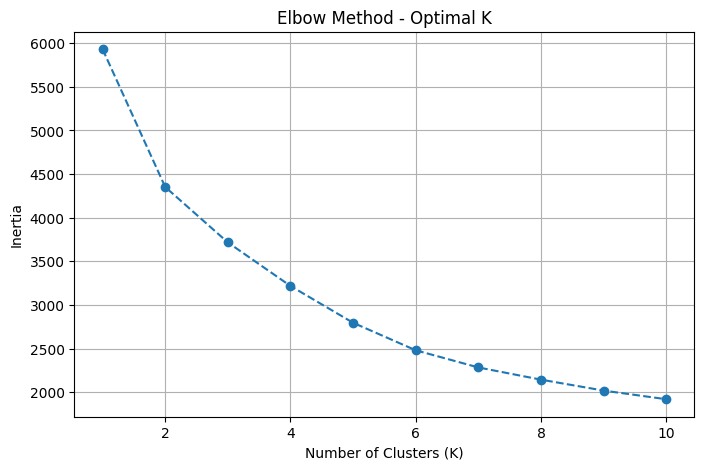

In [46]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--')
plt.title('Elbow Method - Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

KMeans with Chosen K (e.g., K=4)

In [47]:
kmeans_final = KMeans(n_clusters=4, random_state=42)
df_final['Cluster'] = kmeans_final.fit_predict(cluster_scaled)


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [48]:
from sklearn.decomposition import PCA
import seaborn as sns

In [49]:
pca = PCA(n_components=2)
cluster_2d = pca.fit_transform(cluster_scaled)

In [50]:
cluster_plot_df = pd.DataFrame(cluster_2d, columns=['PCA1', 'PCA2'])
cluster_plot_df['Cluster'] = df_final['Cluster']

PCA PLOT

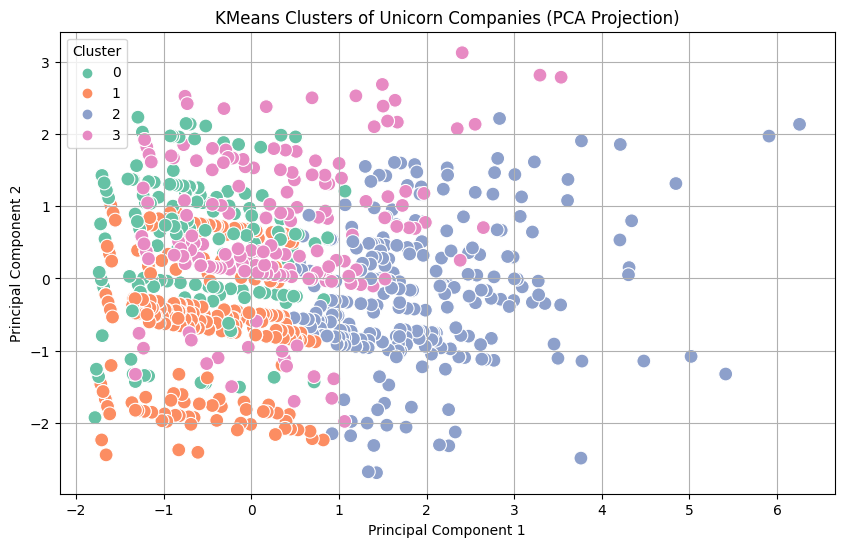

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=cluster_plot_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title('KMeans Clusters of Unicorn Companies (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [52]:
df_final['cluster'] = kmeans.labels_

In [53]:
cluster_summary = df_final.groupby('cluster')[['Valuation ($B)', 'Investor Count', 'VC Power Score']].mean()
print(cluster_summary)

         Valuation ($B)  Investor Count  VC Power Score
cluster                                                
0              1.684891        2.306569        0.240876
1              1.072500        2.835227        0.000000
2              3.420096        2.913462        1.000000
3              3.411556        2.888889        0.344444
4              1.208504        2.929134        1.165354
5              1.183289        2.868421        0.243421
6              5.706260        2.778626        0.000000
7              3.767250        3.000000        2.125000
8              1.829777        2.849162        0.000000
9             24.292400        2.860000        1.060000
